EECS435   -- Shixuan Guo   -- 3146754  --  HOMEWORK1

EXAMPLE:

In [1]:
import matplotlib.pyplot as plt

In [2]:
import autograd.numpy as np

In [3]:
from autograd import grad   

In [3]:
g = lambda w: np.sin(w)

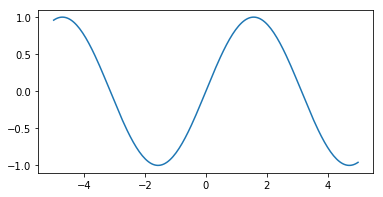

In [6]:
# create a sample of points to plot over 
w_vals = np.linspace(-5,5,200)

# evaluate the function over each of these values - one can use an explicit for-loop here instead of a list comprehension
g_vals = [g(v) for v in w_vals]

# plot
fig, ax = plt.subplots(1, 1, figsize=(6,3))
ax.plot(w_vals,g_vals)
plt.show()

In [4]:
from autograd import grad   
nabla_g = grad(g)
w_val = 1.0
nabla_g(1.0)

0.54030230586813977

Exercise 1:

In [39]:
class GradViewer(object):
    def __init__(self,my_function):
        self.my_function = my_function
 
    def plot_it(self):
        nabla_g = grad(self.my_function)
        # create space over which to evaluate function and gradient
        w_vals = np.linspace(-5,5,200)

        # evaluate gradient over input range
        g_vals = [self.my_function(v) for v in w_vals]
        grad_vals = [nabla_g(v) for v in w_vals]

        # create figure
        fig, ax = plt.subplots(1, 1, figsize=(6,3))

        # plot function and gradient values
        ax.plot(w_vals,g_vals)
        ax.plot(w_vals,grad_vals)
        ax.legend(['func','derivative'],loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()

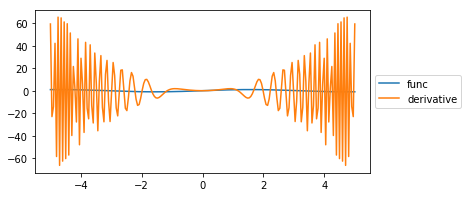

In [15]:
def my_function(w):                 
    y = np.sin(w**3)
    return y
test = GradViewer(my_function)
test.plot_it()

Next visualize the following function

\begin{equation}
g(w) = \sum_{n = 0}^{10} \text{cos}(n\cdot w)
\end{equation}

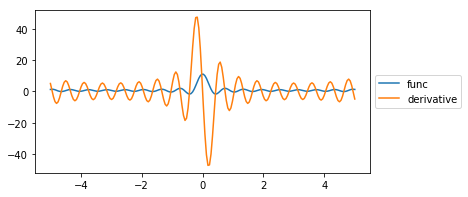

In [40]:
def g(w):
    value = 0
    for i in range(11):
        value = value + np.cos(i*w)
    return value
test_2 = GradViewer(g)
test_2.plot_it()

Exercise 2:

In [72]:
class OrderViewer(object):
    def __init__(self,my_function):
        self.my_function = my_function
    def compute_it(self,order):
        self.order = order
        self.nabla_g = grad(self.my_function)
        for i in range(order-1):
            self.nabla_g = grad(self.nabla_g)
 
    def plot_it(self):
        
        # create space over which to evaluate function and gradient
        w_vals = np.linspace(-5,5,200)

        # evaluate gradient over input range
        g_vals = [self.my_function(v) for v in w_vals]
        grad_vals = [self.nabla_g(v) for v in w_vals]

        # create figure
        fig, ax = plt.subplots(1, 1, figsize=(6,3))

        # plot function and gradient values
        ax.plot(w_vals,g_vals)
        ax.plot(w_vals,grad_vals)
        ax.legend(['func','derivative of order'+ str(self.order)],loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()

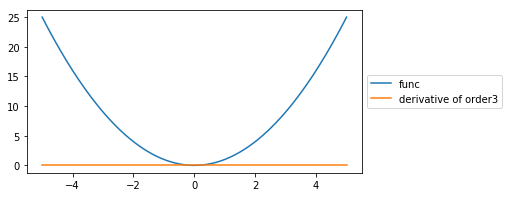

In [74]:
# test function input
def my_function(w):                 
    y = w**2
    return y

# create instance, inputting function on creation
test = OrderViewer(my_function)

# compute desired order derivative
test.compute_it(order = 3)

# plot this derivative and original function
test.plot_it()

Exercise 3:

In [4]:
# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w):
    # compute the gradient of our input function - note this is a function too!
    gradient = grad(g)

    # run the gradient descent loop
    best_w = w # weight we return, should be the one providing lowest evaluation
    whistory = []
    whistory.append(w)
    best_eval = g(w)       # lowest evaluation yet
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        whistory.append(w)
        # return only the weight providing the lowest evaluation
        test_eval = g(w)
        if test_eval < best_eval:
            best_eval = test_eval
            best_w = w
            
    return whistory

In [5]:
# create the input function
g = lambda w: 1/float(50)*(w**4 + w**2 + 10*w)   # try other functions too!  Like g = lambda w: np.cos(2*w) , g = lambda w: np.sin(5*w) + 0.1*w**2, g = lambda w: np.cos(5*w)*np.sin(w)

# run gradient descent
weight_history = gradient_descent(g = g,alpha = 10**-2,max_its = 2000,w = 2.0)

In [9]:
# cost function history plotter
def cost_history(weight_history,g):
    # loop over weight history and compute associated cost function history at each step
    cost_his = []
    for i in weight_history:
        cost_his.append(g(i))     
    # plot cost function history
    plt.plot(cost_his)
    
    plt.show()
    return cost_his

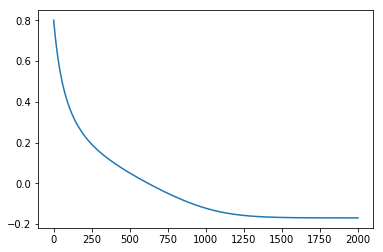

In [10]:
# use cost_history plotter
cost_his = cost_history(weight_history,g)

the weight associated with the smallest cost function value:

In [16]:
small_value = weight_history[cost_his.index(min(cost_his))]
small_value

-1.2198339861245202

Exercise 4:

In [18]:
# data input
csvname = '2d_linregress_data.csv'
data = np.loadtxt(csvname,delimiter = ',')

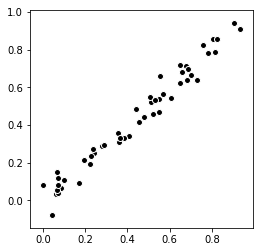

In [7]:
# scatter plot the input data
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(data[:,0],data[:,1],color = 'k',edgecolor = 'w')
plt.show()

In [19]:
# form the input/output data vectors
x = data[:,0]
y = data[:,1]

# least squares cost function for linear regression
def least_squares(w):
    cost = 0
    for p in range(len(y)):
        # get pth input/output pair
        x_p = x[p]
        y_p = y[p]
        
        # form linear combination
        c_p = w[0] + w[1]*x_p
        
        # add least squares for this datapoint
        cost += (c_p - y_p)**2
        
    return cost

In [13]:
# try out least squares function
w = np.asarray([1.5,1.5])
least_squares(w)

149.60536283826102

when alpha = 0.0001:

In [28]:
# run gradient descent
w = np.asarray([1.5,1.5])
weight_history = gradient_descent(g = least_squares,alpha = 0.0001,max_its = 500,w = w)

In [29]:
# MSE history plotter
def MSE(weight_history,g):
    # loop over weight history and compute the MSE at each step o gradient descent
    MSE_value = []
    for i in range(len(weight_history)):
        MSE_value.append(least_squares(weight_history[i])/len(y))       
    # plot cost function history
    plt.plot(MSE_value)
    
    plt.show()

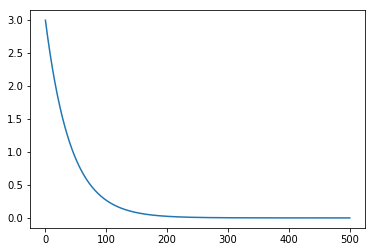

In [30]:
MSE(weight_history,g=least_squares)

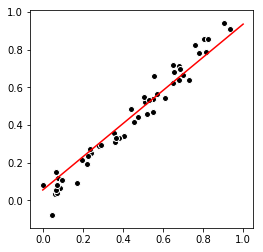

In [32]:
w = weight_history[-1]
# scatter plot the input data
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(data[:,0],data[:,1],color = 'k',edgecolor = 'w')

# fit a trend line
x_vals = np.linspace(0,1,200)
y_vals = w[0] + w[1]*x_vals
ax.plot(x_vals,y_vals,color = 'r')
plt.show()

when alpha= 0.001:

In [23]:
# run gradient descent
w = np.asarray([1.5,1.5])
weight_history = gradient_descent(g = least_squares,alpha = 0.001,max_its = 500,w = w)

In [24]:
# MSE history plotter
def MSE(weight_history,g):
    # loop over weight history and compute the MSE at each step o gradient descent
    MSE_value = []
    for i in range(len(weight_history)):
        MSE_value.append(least_squares(weight_history[i])/len(y))       
    # plot cost function history
    plt.plot(MSE_value)
    
    plt.show()

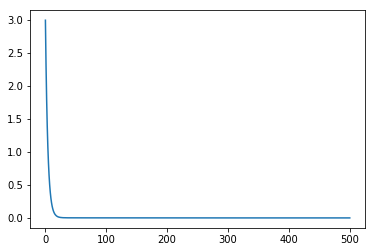

In [25]:
MSE(weight_history,g=least_squares)

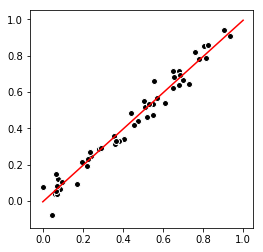

In [26]:
w = weight_history[-1]
# scatter plot the input data
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(data[:,0],data[:,1],color = 'k',edgecolor = 'w')

# fit a trend line
x_vals = np.linspace(0,1,200)
y_vals = w[0] + w[1]*x_vals
ax.plot(x_vals,y_vals,color = 'r')
plt.show()

when alpha=0.00001:

In [27]:
# run gradient descent
w = np.asarray([1.5,1.5])
weight_history = gradient_descent(g = least_squares,alpha = 0.00001,max_its = 500,w = w)

In [28]:
# MSE history plotter
def MSE(weight_history,g):
    # loop over weight history and compute the MSE at each step o gradient descent
    MSE_value = []
    for i in range(len(weight_history)):
        MSE_value.append(least_squares(weight_history[i])/len(y))       
    # plot cost function history
    plt.plot(MSE_value)
    
    plt.show()

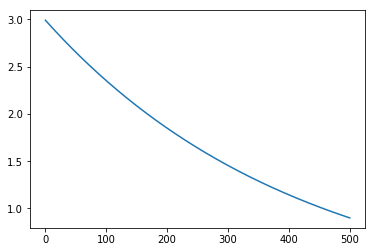

In [29]:
MSE(weight_history,g=least_squares)

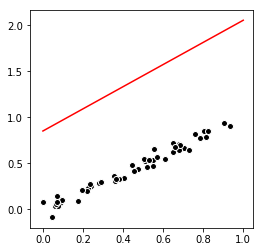

In [30]:
w = weight_history[-1]
# scatter plot the input data
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(data[:,0],data[:,1],color = 'k',edgecolor = 'w')

# fit a trend line
x_vals = np.linspace(0,1,200)
y_vals = w[0] + w[1]*x_vals
ax.plot(x_vals,y_vals,color = 'r')
plt.show()

Exercise 5:

In [33]:
# load in dataset
data = np.loadtxt('highdim_linregress_data.csv',delimiter = ',')

# form the input/output data vectors
x = data[:,:-1]
y = data[:,-1]

In [38]:
# least squares cost function for linear regression
def least_squares(w):
    cost = 0
    for p in range(len(y)):
        # get pth input/output pair
        x_p = x[p]
        y_p = y[p]
        
        # form linear combination
        c_p = w[0]
        for i in range(10):
            c_p = c_p+x_p[i]*w[i+1]
        
        # add least squares for this datapoint
        cost += (c_p - y_p)**2
    return cost

In [39]:
# produce input and input into Least Squares cost function
w = np.ones((11,1))
print (least_squares(w))

[ 7917.97952037]


In [42]:
# run gradient descent
w = np.random.randn(np.shape(x)[1]+1,1)
weight_history = gradient_descent(g = least_squares,alpha = 0.0001,max_its = 100,w = w)

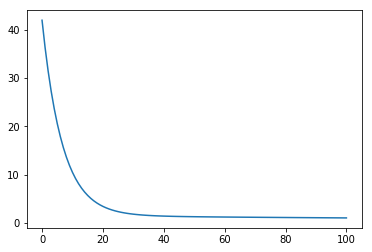

In [43]:
# use cost_history plotter
MSE(weight_history,least_squares)